In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
music_top100=pd.read_csv('Hot100.csv',error_bad_lines=False, engine="python")
music_top100.columns
#Rename song Name to Title
music_top100 = music_top100.rename(columns={'Name':'Title'})
#Keep relevant columns and set song Title as Index
music_top100 = music_top100[['Artists','Title','Weekly.rank','Peak.position','Weeks.on.chart','Week','Date','Genre','Lyrics']].set_index('Title')
#Rename columns to more appealing format
music_top100.columns = ['Artists','Weekly Rank','Peak Position','# of Weeks on Chart','Week','Date','Genre','Lyrics']
#Set Week / Date to Pandas datetime object
music_top100['Week'] = pd.to_datetime(music_top100['Week'])
music_top100['Date'] = pd.to_datetime(music_top100['Date'])
music_top100

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
Skipping line 47586: unexpected end of data


,Artists,Weekly Rank,Peak Position,# of Weeks on Chart,Week,Date,Genre,Lyrics
Title,,,,,,,,
Old Town Road,"Lil Nas,",1,1.0,7.0,2019-07-06,2019-04-05,"Country,Atlanta,Alternative Country,Hip-Hop,Tr...","Old Town Road Remix \nOh, oh-oh\nOh\nYeah, I'm..."
Senorita,"Shawn Mendes, Camila Cabello",2,NaN,NaN,2019-07-06,2019-06-21,Pop,Senorita \nI love it when you call me senorita...
Bad Guy,Billie Eilish,3,2.0,13.0,2019-07-06,2019-03-29,"Hip-Hop,Dark Pop,House,Trap,Memes,Alternative ...","bad guy \nWhite shirt now red, my bloody nose\..."
Talk,Khalid,4,3.0,20.0,2019-07-06,2019-02-07,"Synth-Pop,Pop",Talk \nCan we just talk? Can we just talk?\nTa...
I Don't Care,"Ed Sheeran, Justin Bieber",5,2.0,7.0,2019-07-06,2019-05-10,"Canada,UK,Dance,Dance-Pop,Pop",I Don't Care \nI'm at a party I don't wanna be...
...,...,...,...,...,...,...,...,...
Use Somebody,Kings Of Leon,20,4.0,40.0,2009-11-12,2008-09-19,"Pop-Rock,Pop,Rock","Use Somebody \nI've been roaming around, alway..."
Already Gone,Kelly Clarkson,21,17.0,14.0,2009-11-12,2009-08-11,"R&;B,Pop",Already Gone \nRemember all the things we want...
Need You Now,Lady Antebellum,22,18.0,12.0,2009-11-12,2009-08-11,Country,Need You Now \nPicture perfect memories\nScatt...


In [3]:
sentiment_df = music_top100[['Lyrics']].drop_duplicates()
sentiment_df

,Lyrics
Title,
Old Town Road,"Old Town Road Remix \nOh, oh-oh\nOh\nYeah, I'm..."
Senorita,Senorita \nI love it when you call me senorita...
Bad Guy,"bad guy \nWhite shirt now red, my bloody nose\..."
Talk,Talk \nCan we just talk? Can we just talk?\nTa...
I Don't Care,I Don't Care \nI'm at a party I don't wanna be...
...,...
Number One,Number One \nA lot of these cats out here be f...
Face Drop,"Face Drop \nKingston, hey, face drop, oh\nKing..."
Ain't No Rest For The Wicked,Ain't No Rest for the Wicked \nI was walking d...


In [4]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/mnodini/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
from nltk.sentiment import SentimentIntensityAnalyzer
import operator
sia = SentimentIntensityAnalyzer()
sentiment_df["sentiment_score"] = sentiment_df["Lyrics"].apply(lambda x: sia.polarity_scores(x)["compound"])
sentiment_df["sentiment"] = np.select([sentiment_df["sentiment_score"] < 0, sentiment_df["sentiment_score"] == 0, sentiment_df["sentiment_score"] > 0],
                           ['neg', 'neu', 'pos'])

In [6]:
df = pd.merge(music_top100,sentiment_df,left_on='Lyrics',right_on='Lyrics').drop_duplicates()

In [7]:
df['Group'] = df['Week'].apply(lambda x: x.strftime('%Y-%m'))

In [8]:
df.groupby('Group').mean()

,Weekly Rank,Peak Position,# of Weeks on Chart,sentiment_score
Group,,,,
2009-11,45.917051,32.386935,10.376884,0.576574
2009-12,49.839836,36.185185,10.717593,0.505589
2010-01,50.020253,36.800532,12.510638,0.463274
2010-02,49.863402,33.534626,13.698061,0.493371
2010-03,49.792553,34.260000,13.900000,0.450100
...,...,...,...,...
2019-03,50.243952,34.971047,13.795100,0.184011
2019-04,50.476071,36.088398,14.566298,0.234355
2019-05,50.405063,35.217984,14.656676,0.232701


In [9]:
x_axis = df['Week']
x_axis

0       2019-07-06
1       2019-06-29
2       2019-06-22
3       2019-06-15
4       2019-06-08
           ...    
47579   2009-11-19
47580   2009-11-19
47581   2009-11-19
47582   2009-11-12
47583   2009-11-19
Name: Week, Length: 47584, dtype: datetime64[ns]

In [10]:
sentiment = df.groupby('Group').mean()[['sentiment_score']]
sentiment

,sentiment_score
Group,
2009-11,0.576574
2009-12,0.505589
2010-01,0.463274
2010-02,0.493371
2010-03,0.450100
...,...
2019-03,0.184011
2019-04,0.234355
2019-05,0.232701


In [11]:
df = pd.merge(df,sentiment,left_on='Group',right_on='Group')
# df

In [12]:
# df.groupby('Group').mean()

In [14]:
sns.set(rc = {'figure.figsize':(15,8)})
# sns.set_style("graygrid")

/tmp/ipykernel_74/1499262519.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  ax.axvspan(xmin=pd.datetime(i,12,21),xmax=pd.datetime(i+1,3,20),alpha=0.8)
/tmp/ipykernel_74/1499262519.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  ax.axvspan(xmin=pd.datetime(i,6,21),xmax=pd.datetime(i,9,20),alpha=0.2,color='orange')


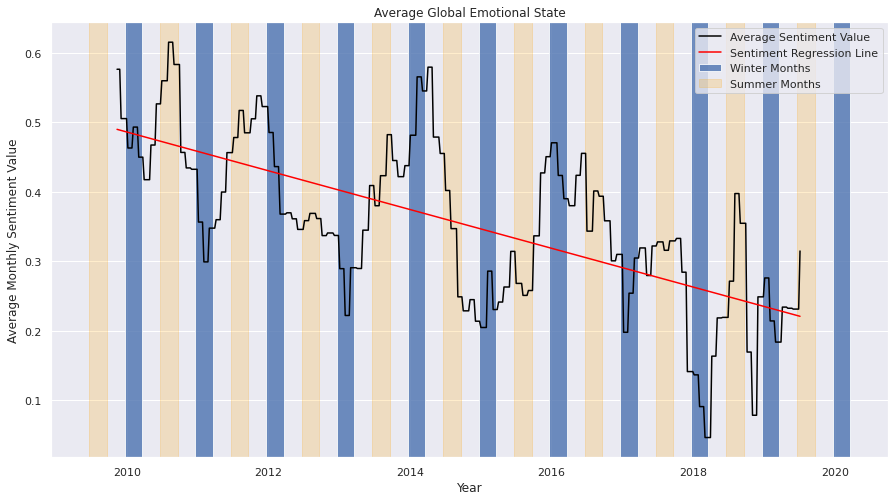

In [27]:
ax = sns.lineplot(data=df.groupby('Week').mean(),x='Week',y='sentiment_score_y',color='black')
for i in range(2009,2020):
    ax.axvspan(xmin=pd.datetime(i,12,21),xmax=pd.datetime(i+1,3,20),alpha=0.8)
    ax.axvspan(xmin=pd.datetime(i,6,21),xmax=pd.datetime(i,9,20),alpha=0.2,color='orange')
ax.set_xlabel('Year')
ax.set_ylabel('Average Monthly Sentiment Value')
ax.set_title('Average Global Emotional State')
x = np.array(list(range(1,505)))
m = np.sum((x - np.mean(x)) * (y - np.mean(y))) / sum((x - np.mean(x))**2)
b = np.mean(y) - m * np.mean(x)
y = m*x + b
ax.plot(df.groupby('Week').mean().index,y,color='red')
ax.legend(labels=['Average Sentiment Value','Sentiment Regression Line','Winter Months','Summer Months'])

In [14]:
df.groupby('Week').mean()

,Weekly Rank,Peak Position,# of Weeks on Chart,sentiment_score_x,sentiment_score_y
Week,,,,,
2009-11-12,12.500000,7.600000,12.750000,0.672271,0.576574
2009-11-19,49.854167,35.455556,10.077778,0.539420,0.576574
2009-11-26,50.288660,34.853933,10.146067,0.589668,0.576574
2009-12-03,50.164948,35.821429,10.452381,0.481384,0.505589
2009-12-10,49.886598,34.397590,10.590361,0.520484,0.505589
...,...,...,...,...,...
2019-06-08,50.191919,33.043956,14.131868,0.202358,0.231480
2019-06-15,49.237113,32.681818,14.522727,0.238779,0.231480
2019-06-22,50.353535,33.693182,14.954545,0.254871,0.231480


In [15]:
df.head()

,Artists,Weekly Rank,Peak Position,# of Weeks on Chart,Week,Date,Genre,Lyrics,sentiment_score_x,sentiment,Group,sentiment_score_y
0,"Lil Nas,",1,1.0,7.0,2019-07-06,2019-04-05,"Country,Atlanta,Alternative Country,Hip-Hop,Tr...","Old Town Road Remix \nOh, oh-oh\nOh\nYeah, I'm...",0.9643,pos,2019-07,0.315063
1,"Shawn Mendes, Camila Cabello",2,NaN,NaN,2019-07-06,2019-06-21,Pop,Senorita \nI love it when you call me senorita...,0.9990,pos,2019-07,0.315063
2,Billie Eilish,3,2.0,13.0,2019-07-06,2019-03-29,"Hip-Hop,Dark Pop,House,Trap,Memes,Alternative ...","bad guy \nWhite shirt now red, my bloody nose\...",-0.9969,neg,2019-07,0.315063
3,Khalid,4,3.0,20.0,2019-07-06,2019-02-07,"Synth-Pop,Pop",Talk \nCan we just talk? Can we just talk?\nTa...,-0.8717,neg,2019-07,0.315063
4,"Ed Sheeran, Justin Bieber",5,2.0,7.0,2019-07-06,2019-05-10,"Canada,UK,Dance,Dance-Pop,Pop",I Don't Care \nI'm at a party I don't wanna be...,0.9916,pos,2019-07,0.315063


In [16]:
temp = df.groupby('Week').mean().reset_index()
temp.head()
x = temp['Week']
y = temp['sentiment_score_x']

In [31]:
np.mean(x)
np.mean(y)

0.35562600077518114

In [71]:
# sns.lineplot(x,y)

In [72]:
# sns.regplot(x=x,y=y)

In [ ]:
df.groupby('Week').mean().reset_index()